# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

22:17:12 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=332330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=318935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=318176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=702760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=547594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=589416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

22:17:14 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=226630;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=190972;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

22:17:15 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=12082;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=544788;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

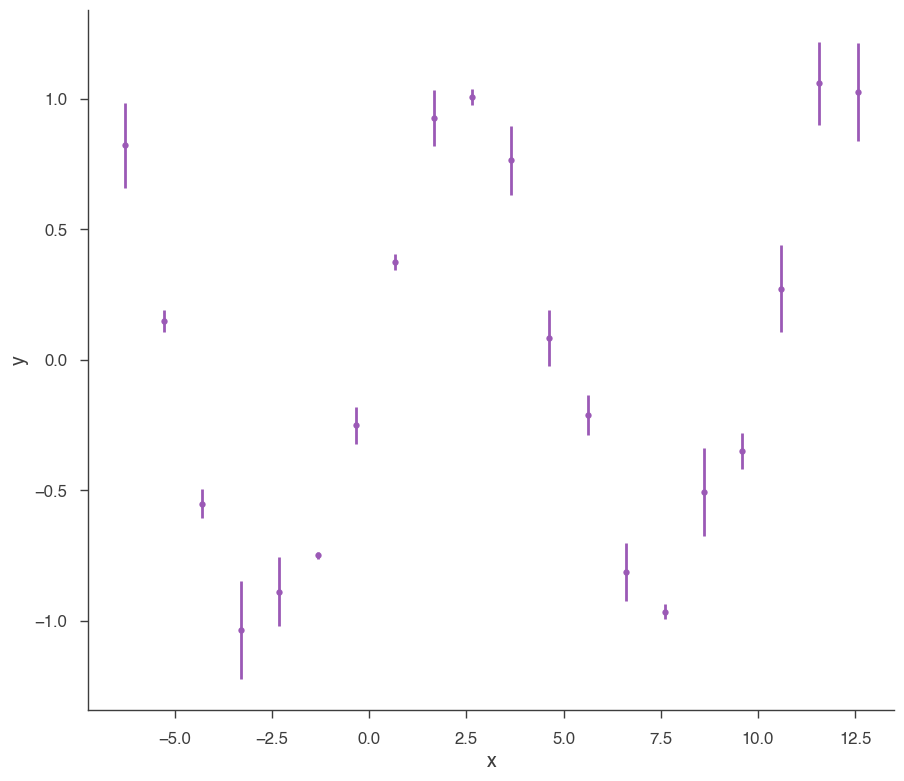

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=194494;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=340050;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

22:17:18 INFO      Mean acceptance fraction: 0.7206999999999999                                ]8;id=253223;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=419004;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

22:17:19 INFO      fit restored to maximum of posterior                                         ]8;id=931138;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=374346;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=475627;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=101226;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 -0.013 +0.012,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.88 +/- 0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.924711
total,-10.924711


Values of statistical measures:

,statistical measures
AIC,26.555304
BIC,27.840886
DIC,25.729262
PDIC,1.938592


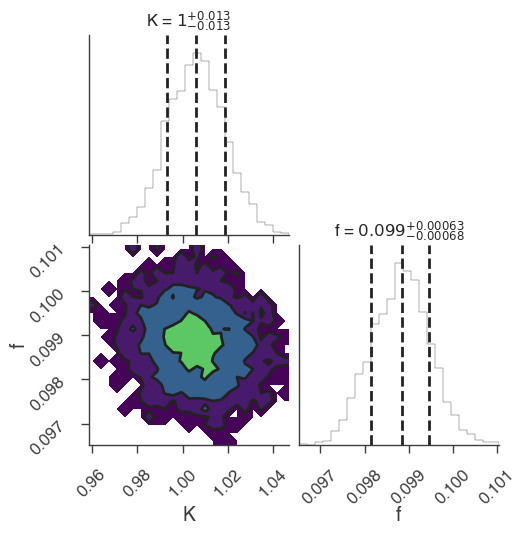

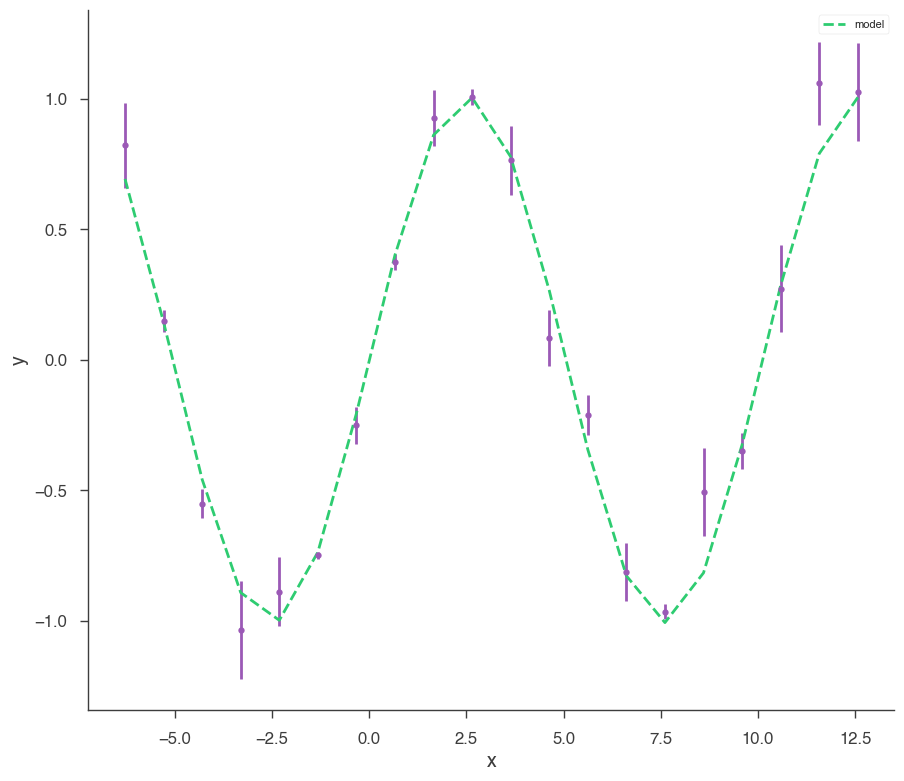

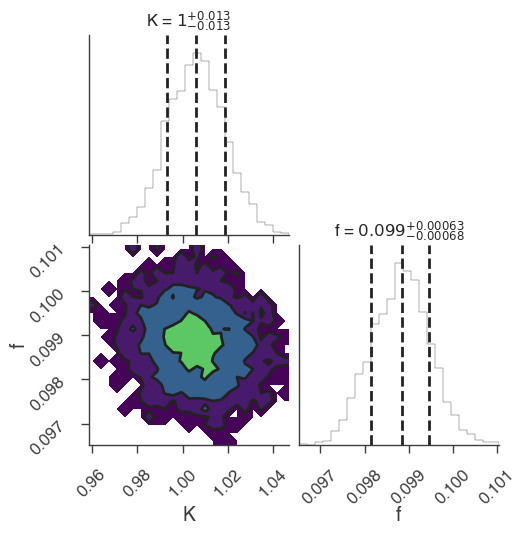

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

22:17:20 INFO      sampler set to multinest                                                ]8;id=96340;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=804568;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -20.219864601307840      +/-  0.14375594527396279     
 Total Likelihood Evaluations:         5347
 Sampling finished. Exiting MultiNest



22:17:21 INFO      fit restored to maximum of posterior                                         ]8;id=539263;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=749126;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=102542;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=136944;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 -0.013 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.88 -0.07 +0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.924957
total,-10.924957


Values of statistical measures:

,statistical measures
AIC,26.555797
BIC,27.841379
DIC,26.013032
PDIC,2.079833
log(Z),-8.781376


         INFO      deleting the chain directory chains                                     ]8;id=493497;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=156062;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

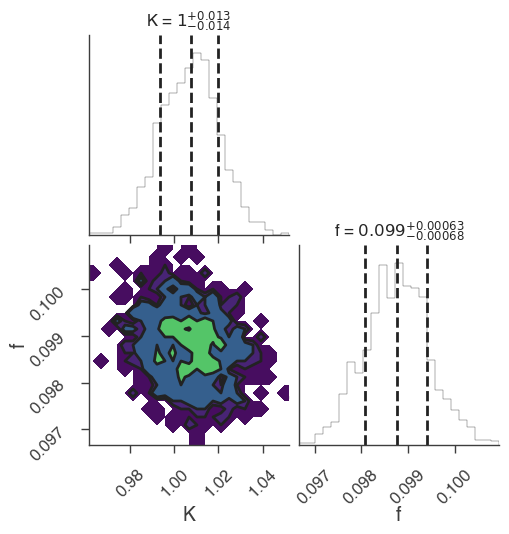

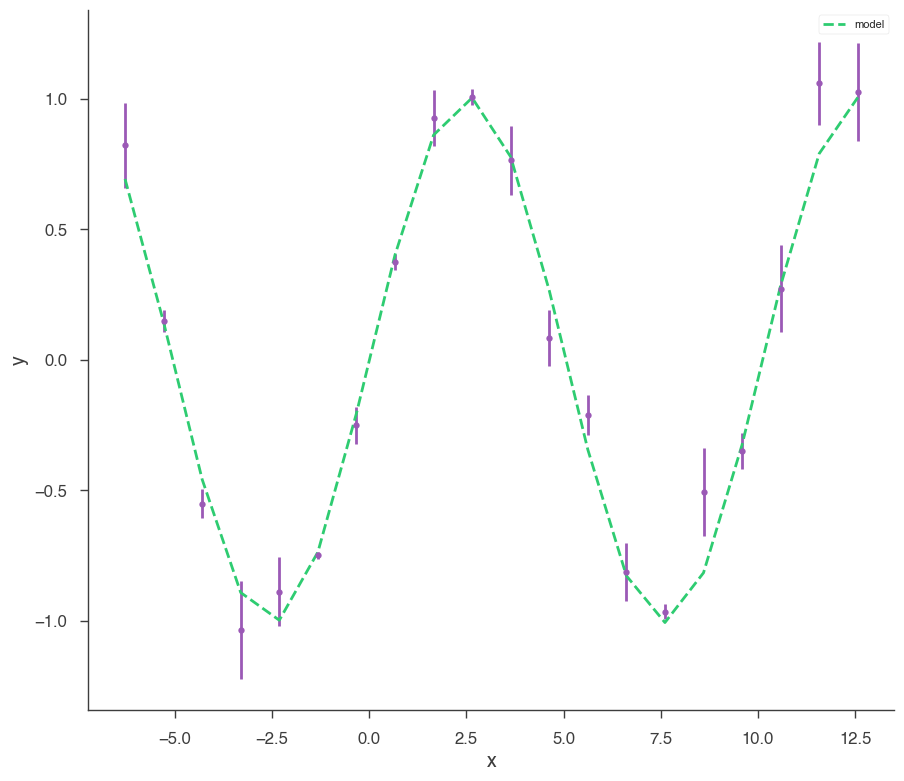

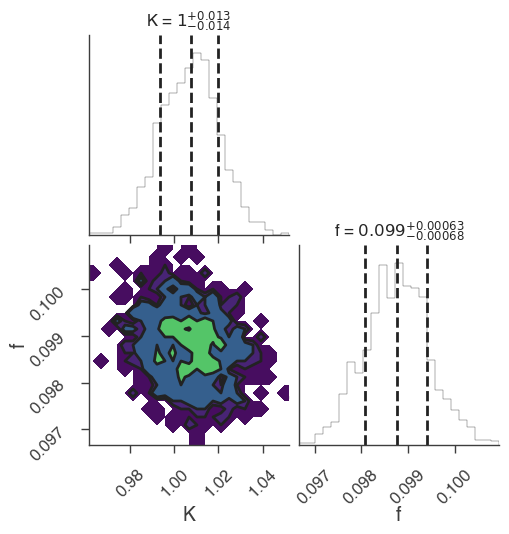

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=234532;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=457515;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

242it [00:00, 2416.26it/s, bound: 0 | nc: 4 | ncall: 726 | eff(%): 33.333 | loglstar:   -inf < -3428.048 <    inf | logz: -3434.834 +/-  0.126 | dlogz: 3409.004 >  0.409]

484it [00:00, 1848.70it/s, bound: 0 | nc: 1 | ncall: 1351 | eff(%): 35.825 | loglstar:   -inf < -2493.569 <    inf | logz: -2500.916 +/-  0.131 | dlogz: 2474.394 >  0.409]

677it [00:00, 1419.42it/s, bound: 0 | nc: 2 | ncall: 2223 | eff(%): 30.454 | loglstar:   -inf < -1892.911 <    inf | logz: -1900.936 +/-  0.136 | dlogz: 1873.941 >  0.409]

830it [00:00, 1227.29it/s, bound: 0 | nc: 13 | ncall: 3133 | eff(%): 26.492 | loglstar:   -inf < -1552.504 <    inf | logz: -1561.165 +/-  0.145 | dlogz: 1545.983 >  0.409]

960it [00:00, 1071.57it/s, bound: 0 | nc: 8 | ncall: 4230 | eff(%): 22.695 | loglstar:   -inf < -978.714 <    inf | logz: -987.287 +/-  0.141 | dlogz: 971.903 >  0.409]    

1073it [00:00, 909.73it/s, bound: 0 | nc: 1 | ncall: 5575 | eff(%): 19.247 | loglstar:   -inf < -713.762 <    inf | logz: -721.783 +/-  0.139 | dlogz: 708.060 >  0.409]

1169it [00:01, 725.87it/s, bound: 0 | nc: 13 | ncall: 6671 | eff(%): 17.524 | loglstar:   -inf < -566.659 <    inf | logz: -574.586 +/-  0.134 | dlogz: 560.291 >  0.409]

1248it [00:01, 578.50it/s, bound: 0 | nc: 3 | ncall: 8007 | eff(%): 15.586 | loglstar:   -inf < -469.571 <    inf | logz: -478.775 +/-  0.148 | dlogz: 466.145 >  0.409] 

1313it [00:01, 441.80it/s, bound: 0 | nc: 41 | ncall: 9722 | eff(%): 13.505 | loglstar:   -inf < -409.044 <    inf | logz: -418.753 +/-  0.151 | dlogz: 406.486 >  0.409]

1365it [00:01, 411.01it/s, bound: 0 | nc: 14 | ncall: 11036 | eff(%): 12.369 | loglstar:   -inf < -361.144 <    inf | logz: -369.491 +/-  0.137 | dlogz: 355.448 >  0.409]

1411it [00:02, 377.87it/s, bound: 0 | nc: 13 | ncall: 12438 | eff(%): 11.344 | loglstar:   -inf < -316.318 <    inf | logz: -325.411 +/-  0.145 | dlogz: 311.724 >  0.409]

1452it [00:02, 306.45it/s, bound: 0 | nc: 105 | ncall: 13914 | eff(%): 10.436 | loglstar:   -inf < -291.407 <    inf | logz: -300.384 +/-  0.143 | dlogz: 286.351 >  0.409]

1486it [00:02, 239.72it/s, bound: 1 | nc: 1 | ncall: 14804 | eff(%): 10.038 | loglstar:   -inf < -268.055 <    inf | logz: -277.964 +/-  0.150 | dlogz: 264.634 >  0.409]  

1679it [00:02, 509.76it/s, bound: 1 | nc: 3 | ncall: 15100 | eff(%): 11.119 | loglstar:   -inf < -168.659 <    inf | logz: -177.759 +/-  0.147 | dlogz: 163.000 >  0.409]

1819it [00:02, 564.41it/s, bound: 2 | nc: 1 | ncall: 15404 | eff(%): 11.809 | loglstar:   -inf < -121.624 <    inf | logz: -130.809 +/-  0.145 | dlogz: 115.565 >  0.409]

2088it [00:02, 950.13it/s, bound: 2 | nc: 1 | ncall: 15793 | eff(%): 13.221 | loglstar:   -inf < -69.333 <    inf | logz: -78.525 +/-  0.145 | dlogz: 62.465 >  0.409]   

2221it [00:03, 923.56it/s, bound: 3 | nc: 1 | ncall: 16056 | eff(%): 13.833 | loglstar:   -inf < -51.737 <    inf | logz: -61.094 +/-  0.144 | dlogz: 44.676 >  0.409]

2440it [00:03, 1187.91it/s, bound: 3 | nc: 5 | ncall: 16397 | eff(%): 14.881 | loglstar:   -inf < -33.725 <    inf | logz: -42.948 +/-  0.145 | dlogz: 25.936 >  0.409]

2589it [00:03, 1062.88it/s, bound: 4 | nc: 2 | ncall: 16674 | eff(%): 15.527 | loglstar:   -inf < -26.929 <    inf | logz: -36.312 +/-  0.144 | dlogz: 18.918 >  0.409]

2776it [00:03, 1236.70it/s, bound: 4 | nc: 2 | ncall: 17015 | eff(%): 16.315 | loglstar:   -inf < -21.136 <    inf | logz: -30.376 +/-  0.144 | dlogz: 12.494 >  0.409]

2923it [00:03, 1055.92it/s, bound: 5 | nc: 2 | ncall: 17270 | eff(%): 16.925 | loglstar:   -inf < -17.719 <    inf | logz: -27.017 +/-  0.144 | dlogz:  8.817 >  0.409]

3127it [00:03, 1267.27it/s, bound: 5 | nc: 2 | ncall: 17586 | eff(%): 17.781 | loglstar:   -inf < -15.108 <    inf | logz: -24.275 +/-  0.143 | dlogz:  5.560 >  0.409]

3276it [00:03, 1084.61it/s, bound: 6 | nc: 1 | ncall: 17866 | eff(%): 18.337 | loglstar:   -inf < -13.673 <    inf | logz: -22.978 +/-  0.143 | dlogz:  3.907 >  0.409]

3477it [00:04, 1285.11it/s, bound: 6 | nc: 1 | ncall: 18188 | eff(%): 19.117 | loglstar:   -inf < -12.555 <    inf | logz: -21.814 +/-  0.144 | dlogz:  2.321 >  0.409]

3627it [00:04, 1074.37it/s, bound: 7 | nc: 2 | ncall: 18479 | eff(%): 19.628 | loglstar:   -inf < -12.067 <    inf | logz: -21.272 +/-  0.143 | dlogz:  1.542 >  0.409]

3839it [00:04, 1297.30it/s, bound: 7 | nc: 1 | ncall: 18799 | eff(%): 20.421 | loglstar:   -inf < -11.592 <    inf | logz: -20.793 +/-  0.143 | dlogz:  0.850 >  0.409]

3992it [00:04, 1111.13it/s, bound: 8 | nc: 2 | ncall: 19088 | eff(%): 20.914 | loglstar:   -inf < -11.373 <    inf | logz: -20.576 +/-  0.143 | dlogz:  0.552 >  0.409]

4099it [00:04, 880.07it/s, +400 | bound: 8 | nc: 1 | ncall: 19640 | eff(%): 23.384 | loglstar:   -inf < -10.919 <    inf | logz: -20.115 +/-  0.143 | dlogz:  0.001 >  0.409]

22:17:26 INFO      fit restored to maximum of posterior                                         ]8;id=263152;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=970591;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=326363;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=10241;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 -0.012 +0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.88 -0.06 +0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.925352
total,-10.925352


Values of statistical measures:

,statistical measures
AIC,26.556587
BIC,27.842170
DIC,25.773575
PDIC,1.962053
log(Z),-8.735692


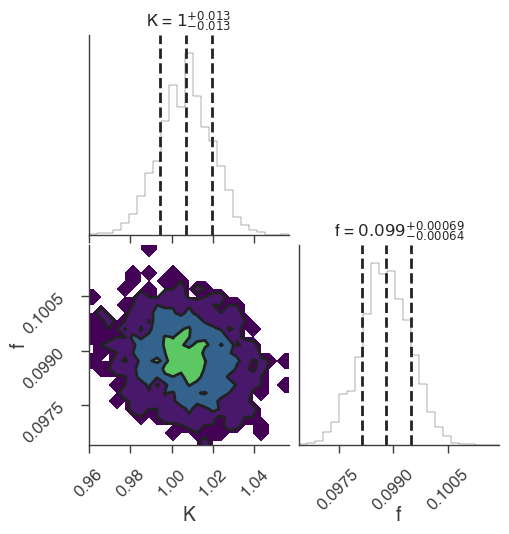

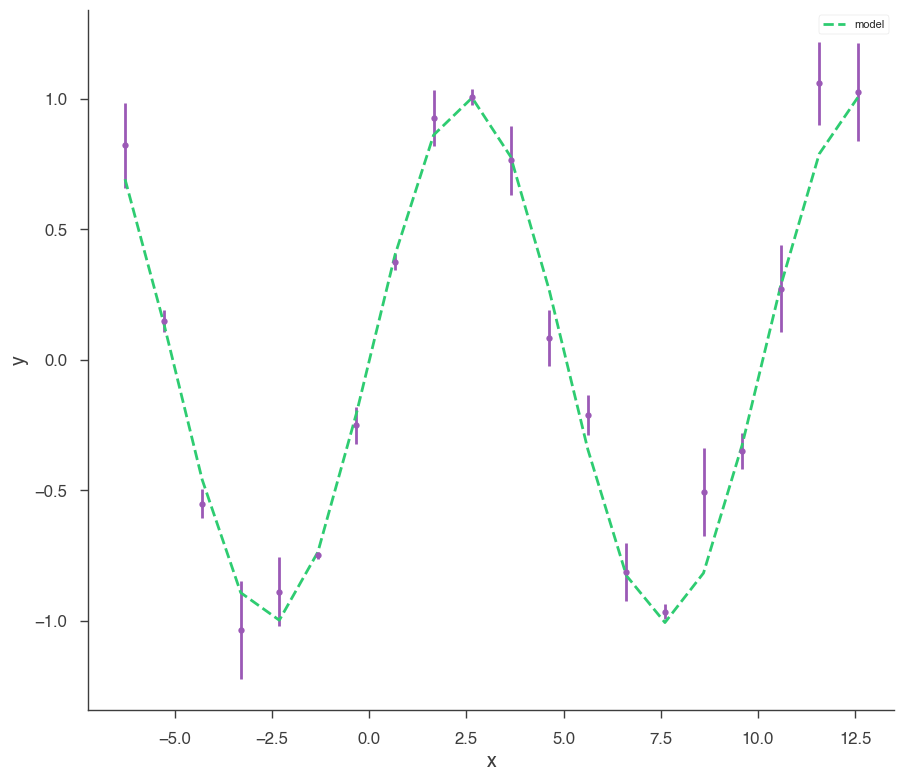

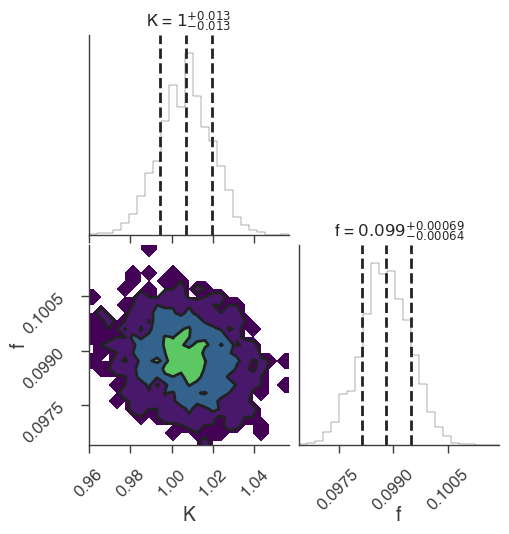

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

22:17:27 INFO      sampler set to dynesty_dynamic                                          ]8;id=635828;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=463128;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

102it [00:00, 1019.53it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 115 | eff(%): 16.585 | loglstar:   -inf < -5266.003 <    inf | logz: -5273.115 +/-  0.119 | dlogz: 5259.720 >  0.010]

308it [00:00, 1628.41it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 445 | eff(%): 32.593 | loglstar:   -inf < -3338.492 <    inf | logz: -3345.714 +/-  0.116 | dlogz: 3335.211 >  0.010]

473it [00:00, 1637.88it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 820 | eff(%): 35.833 | loglstar:   -inf < -2853.522 <    inf | logz: -2861.375 +/-  0.125 | dlogz: 2860.089 >  0.010]

637it [00:00, 1550.96it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 1341 | eff(%): 34.601 | loglstar:   -inf < -2373.744 <    inf | logz: -2381.919 +/-  0.127 | dlogz: 2374.167 >  0.010]

793it [00:00, 1320.41it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 2039 | eff(%): 31.233 | loglstar:   -inf < -1904.450 <    inf | logz: -1912.276 +/-  0.122 | dlogz: 1900.171 >  0.010]

930it [00:00, 1130.84it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 2823 | eff(%): 27.987 | loglstar:   -inf < -1645.898 <    inf | logz: -1654.646 +/-  0.131 | dlogz: 1645.230 >  0.010]

1050it [00:00, 954.78it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 3829 | eff(%): 24.255 | loglstar:   -inf < -1289.305 <    inf | logz: -1297.899 +/-  0.126 | dlogz: 1285.484 >  0.010]

1153it [00:01, 860.74it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 4738 | eff(%): 22.012 | loglstar:   -inf < -965.375 <    inf | logz: -973.964 +/-  0.123 | dlogz: 960.750 >  0.010]   

1245it [00:01, 787.16it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 5887 | eff(%): 19.493 | loglstar:   -inf < -775.201 <    inf | logz: -784.442 +/-  0.132 | dlogz: 772.304 >  0.010]

1328it [00:01, 687.48it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 6888 | eff(%): 17.975 | loglstar:   -inf < -652.906 <    inf | logz: -661.552 +/-  0.127 | dlogz: 648.048 >  0.010]

1400it [00:01, 619.69it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 8224 | eff(%): 16.048 | loglstar:   -inf < -555.526 <    inf | logz: -564.046 +/-  0.123 | dlogz: 549.947 >  0.010]

1465it [00:01, 537.97it/s, batch: 0 | bound: 0 | nc: 68 | ncall: 9722 | eff(%): 14.332 | loglstar:   -inf < -494.384 <    inf | logz: -503.148 +/-  0.126 | dlogz: 489.024 >  0.010]

1521it [00:01, 463.64it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 10815 | eff(%): 13.442 | loglstar:   -inf < -442.080 <    inf | logz: -451.476 +/-  0.131 | dlogz: 437.888 >  0.010]

1570it [00:02, 413.16it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 11873 | eff(%): 12.689 | loglstar:   -inf < -409.420 <    inf | logz: -418.898 +/-  0.130 | dlogz: 404.939 >  0.010] 

1613it [00:02, 381.90it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 12810 | eff(%): 12.119 | loglstar:   -inf < -381.702 <    inf | logz: -390.779 +/-  0.133 | dlogz: 376.701 >  0.010]

1652it [00:02, 339.03it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 13737 | eff(%): 11.604 | loglstar:   -inf < -352.470 <    inf | logz: -361.275 +/-  0.126 | dlogz: 346.526 >  0.010]

1687it [00:02, 313.74it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 14716 | eff(%): 11.087 | loglstar:   -inf < -326.169 <    inf | logz: -334.768 +/-  0.124 | dlogz: 319.951 >  0.010] 

1719it [00:02, 248.28it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 16171 | eff(%): 10.311 | loglstar:   -inf < -310.020 <    inf | logz: -319.536 +/-  0.130 | dlogz: 305.624 >  0.010]

1746it [00:02, 205.95it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16876 | eff(%): 10.048 | loglstar:   -inf < -290.877 <    inf | logz: -300.280 +/-  0.131 | dlogz: 286.340 >  0.010] 

1951it [00:03, 548.83it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 17155 | eff(%): 11.051 | loglstar:   -inf < -194.375 <    inf | logz: -203.364 +/-  0.128 | dlogz: 188.419 >  0.010]

2088it [00:03, 719.74it/s, batch: 0 | bound: 1 | nc: 7 | ncall: 17471 | eff(%): 11.619 | loglstar:   -inf < -150.642 <    inf | logz: -159.829 +/-  0.127 | dlogz: 144.612 >  0.010]

2183it [00:03, 613.42it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17651 | eff(%): 12.027 | loglstar:   -inf < -125.851 <    inf | logz: -134.864 +/-  0.128 | dlogz: 119.364 >  0.010]

2381it [00:03, 896.43it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17951 | eff(%): 12.904 | loglstar:   -inf < -87.484 <    inf | logz: -96.329 +/-  0.127 | dlogz: 80.340 >  0.010]   

2547it [00:03, 1069.31it/s, batch: 0 | bound: 2 | nc: 5 | ncall: 18277 | eff(%): 13.564 | loglstar:   -inf < -64.501 <    inf | logz: -73.729 +/-  0.130 | dlogz: 57.416 >  0.010]

2678it [00:03, 899.87it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18465 | eff(%): 14.121 | loglstar:   -inf < -53.764 <    inf | logz: -62.837 +/-  0.127 | dlogz: 46.213 >  0.010] 

2869it [00:03, 1118.95it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 18769 | eff(%): 14.889 | loglstar:   -inf < -39.851 <    inf | logz: -49.072 +/-  0.126 | dlogz: 32.399 >  0.010]

3038it [00:03, 1253.30it/s, batch: 0 | bound: 3 | nc: 5 | ncall: 19112 | eff(%): 15.491 | loglstar:   -inf < -31.752 <    inf | logz: -40.744 +/-  0.127 | dlogz: 23.734 >  0.010]

3183it [00:04, 1046.19it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19286 | eff(%): 16.087 | loglstar:   -inf < -27.315 <    inf | logz: -36.064 +/-  0.126 | dlogz: 18.805 >  0.010]

3373it [00:04, 1237.85it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19614 | eff(%): 16.769 | loglstar:   -inf < -21.472 <    inf | logz: -30.711 +/-  0.128 | dlogz: 13.075 >  0.010]

3517it [00:04, 952.56it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19896 | eff(%): 17.244 | loglstar:   -inf < -18.994 <    inf | logz: -28.129 +/-  0.127 | dlogz: 10.198 >  0.010] 

3721it [00:04, 1174.89it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20171 | eff(%): 18.001 | loglstar:   -inf < -16.362 <    inf | logz: -25.467 +/-  0.127 | dlogz:  7.123 >  0.010]

3887it [00:04, 1283.05it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20509 | eff(%): 18.502 | loglstar:   -inf < -14.899 <    inf | logz: -23.954 +/-  0.127 | dlogz:  5.281 >  0.010]

4038it [00:04, 1034.66it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20736 | eff(%): 19.015 | loglstar:   -inf < -13.783 <    inf | logz: -22.925 +/-  0.127 | dlogz:  3.963 >  0.010]

4225it [00:05, 1208.73it/s, batch: 0 | bound: 6 | nc: 6 | ncall: 21048 | eff(%): 19.607 | loglstar:   -inf < -12.842 <    inf | logz: -22.002 +/-  0.128 | dlogz:  2.715 >  0.010]

4371it [00:05, 914.95it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21373 | eff(%): 19.984 | loglstar:   -inf < -12.352 <    inf | logz: -21.480 +/-  0.128 | dlogz:  1.980 >  0.010] 

4568it [00:05, 1118.06it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 21664 | eff(%): 20.610 | loglstar:   -inf < -11.872 <    inf | logz: -20.994 +/-  0.128 | dlogz:  1.277 >  0.010]

4736it [00:05, 1239.50it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 21986 | eff(%): 21.062 | loglstar:   -inf < -11.623 <    inf | logz: -20.716 +/-  0.127 | dlogz:  0.875 >  0.010]

4885it [00:05, 1015.39it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22224 | eff(%): 21.497 | loglstar:   -inf < -11.417 <    inf | logz: -20.536 +/-  0.127 | dlogz:  0.625 >  0.010]

5070it [00:05, 1187.19it/s, batch: 0 | bound: 8 | nc: 4 | ncall: 22502 | eff(%): 22.042 | loglstar:   -inf < -11.269 <    inf | logz: -20.375 +/-  0.127 | dlogz:  0.413 >  0.010]

5225it [00:05, 1263.00it/s, batch: 0 | bound: 8 | nc: 14 | ncall: 22872 | eff(%): 22.356 | loglstar:   -inf < -11.167 <    inf | logz: -20.279 +/-  0.127 | dlogz:  0.293 >  0.010]

5370it [00:06, 1051.35it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23045 | eff(%): 22.807 | loglstar:   -inf < -11.101 <    inf | logz: -20.212 +/-  0.127 | dlogz:  0.214 >  0.010] 

5550it [00:06, 1215.18it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23359 | eff(%): 23.262 | loglstar:   -inf < -11.047 <    inf | logz: -20.152 +/-  0.127 | dlogz:  0.146 >  0.010]

5691it [00:06, 970.47it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23646 | eff(%): 23.569 | loglstar:   -inf < -11.012 <    inf | logz: -20.119 +/-  0.127 | dlogz:  0.108 >  0.010]

5896it [00:06, 1194.48it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23915 | eff(%): 24.149 | loglstar:   -inf < -10.983 <    inf | logz: -20.084 +/-  0.127 | dlogz:  0.071 >  0.010]

6081it [00:06, 1343.58it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 24259 | eff(%): 24.561 | loglstar:   -inf < -10.963 <    inf | logz: -20.063 +/-  0.127 | dlogz:  0.048 >  0.010]

6237it [00:06, 1131.17it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 24497 | eff(%): 24.951 | loglstar:   -inf < -10.952 <    inf | logz: -20.050 +/-  0.127 | dlogz:  0.035 >  0.010]

6442it [00:06, 1334.85it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24808 | eff(%): 25.454 | loglstar:   -inf < -10.941 <    inf | logz: -20.038 +/-  0.127 | dlogz:  0.023 >  0.010]

6597it [00:07, 1039.50it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25134 | eff(%): 25.735 | loglstar:   -inf < -10.934 <    inf | logz: -20.032 +/-  0.127 | dlogz:  0.017 >  0.010]

6811it [00:07, 1264.41it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 25410 | eff(%): 26.287 | loglstar:   -inf < -10.928 <    inf | logz: -20.026 +/-  0.127 | dlogz:  0.011 >  0.010]

7162it [00:07, 1772.40it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25789 | eff(%): 27.559 | loglstar:   -inf < -10.922 <    inf | logz: -20.019 +/-  0.127 | dlogz:  0.004 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7375it [00:08, 659.44it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26002 | eff(%): 27.811 | loglstar: -12.773 < -12.721 < -11.400 | logz: -20.015 +/-  0.131 | stop:  1.516]          

7578it [00:08, 810.26it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26287 | eff(%): 28.273 | loglstar: -12.773 < -12.173 < -11.400 | logz: -20.015 +/-  0.131 | stop:  1.516]

7749it [00:08, 928.87it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26619 | eff(%): 28.557 | loglstar: -12.773 < -11.820 < -11.400 | logz: -20.015 +/-  0.131 | stop:  1.516]

7919it [00:08, 896.20it/s, batch: 1 | bound: 3 | nc: 3 | ncall: 26883 | eff(%): 28.903 | loglstar: -12.773 < -11.561 < -11.400 | logz: -20.015 +/-  0.131 | stop:  1.516]

8223it [00:08, 1248.81it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27270 | eff(%): 29.758 | loglstar: -12.773 < -11.260 < -11.400 | logz: -20.015 +/-  0.131 | stop:  1.516]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8573it [00:10, 490.01it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 27633 | eff(%): 31.024 | loglstar: -13.203 < -11.885 < -12.769 | logz: -20.028 +/-  0.107 | stop:  1.071] 

8858it [00:10, 663.61it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 27940 | eff(%): 31.310 | loglstar: -13.203 < -12.125 < -12.769 | logz: -20.028 +/-  0.107 | stop:  1.071]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9186it [00:11, 485.48it/s, batch: 3 | bound: 0 | nc: 1 | ncall: 28291 | eff(%): 32.470 | loglstar: -13.630 < -13.410 < -13.194 | logz: -20.034 +/-  0.100 | stop:  1.002]

9554it [00:11, 700.79it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28708 | eff(%): 32.987 | loglstar: -13.630 < -11.977 < -13.194 | logz: -20.034 +/-  0.100 | stop:  1.002]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9779it [00:11, 563.33it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28963 | eff(%): 33.764 | loglstar: -13.630 < -10.919 < -13.194 | logz: -20.034 +/-  0.100 | stop:  0.897]

9779it [00:11, 816.36it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28963 | eff(%): 33.764 | loglstar: -13.630 < -10.919 < -13.194 | logz: -20.034 +/-  0.100 | stop:  0.897]

22:17:40 INFO      fit restored to maximum of posterior                                         ]8;id=732523;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=548416;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=145790;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=304654;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 +/- 0.013,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.88 +/- 0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.924779
total,-10.924779


Values of statistical measures:

,statistical measures
AIC,26.555440
BIC,27.841022
DIC,25.839795
PDIC,1.995218
log(Z),-8.702847


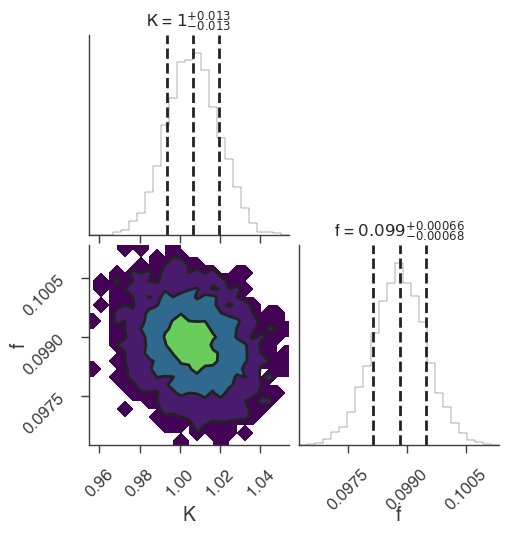

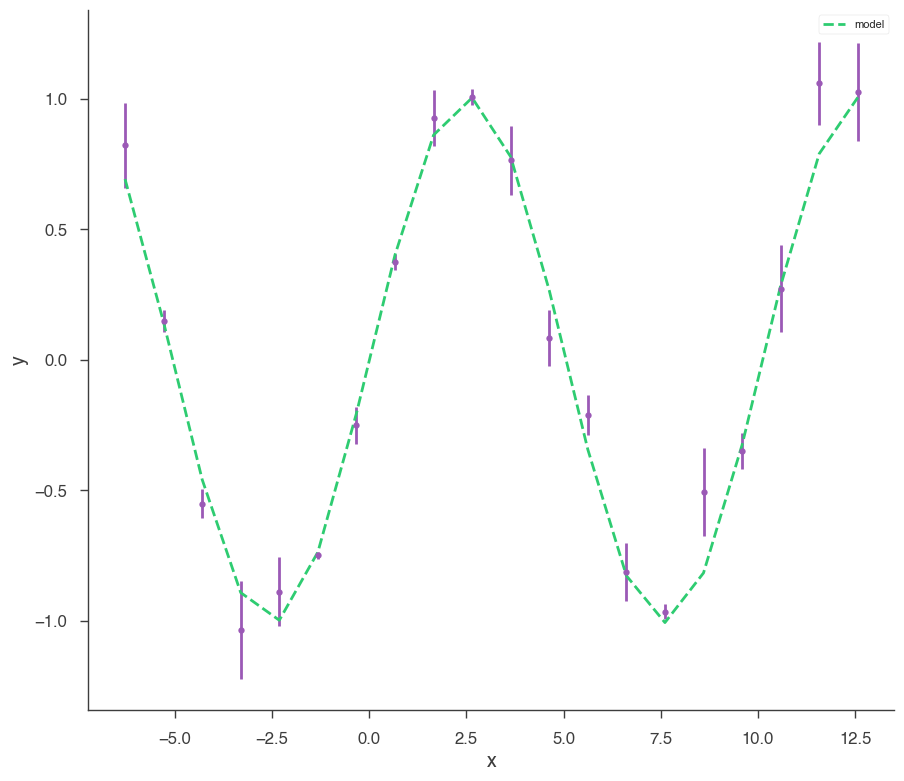

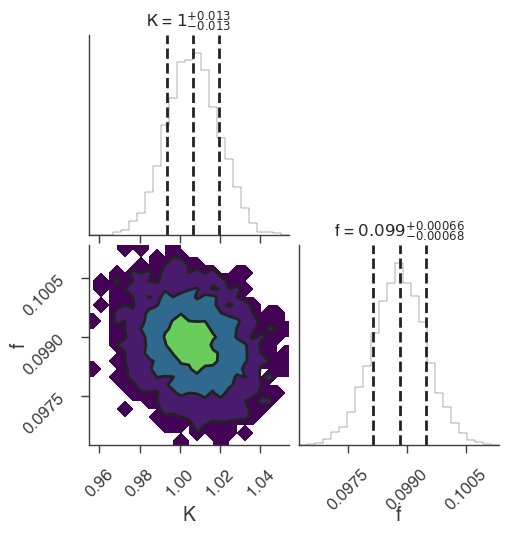

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=955248;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=883231;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:22, 27.38it/s]

Sampling progress :   2%|▏         | 10/625 [00:00<00:17, 35.83it/s]

Sampling progress :   2%|▏         | 14/625 [00:00<00:19, 31.95it/s]

Sampling progress :   3%|▎         | 19/625 [00:00<00:19, 31.32it/s]

Sampling progress :   4%|▎         | 23/625 [00:00<00:24, 24.34it/s]

Sampling progress :   5%|▍         | 30/625 [00:00<00:18, 32.21it/s]

Sampling progress :   6%|▌         | 36/625 [00:01<00:15, 38.16it/s]

Sampling progress :   7%|▋         | 41/625 [00:01<00:15, 36.86it/s]

Sampling progress :   8%|▊         | 48/625 [00:01<00:13, 43.38it/s]

Sampling progress :   8%|▊         | 53/625 [00:01<00:16, 34.99it/s]

Sampling progress :   9%|▉         | 57/625 [00:01<00:16, 33.60it/s]

Sampling progress :  10%|█         | 63/625 [00:01<00:14, 38.90it/s]

Sampling progress :  11%|█         | 69/625 [00:01<00:12, 43.48it/s]

Sampling progress :  12%|█▏        | 74/625 [00:02<00:12, 44.64it/s]

Sampling progress :  13%|█▎        | 82/625 [00:02<00:10, 51.63it/s]

Sampling progress :  14%|█▍        | 88/625 [00:02<00:10, 53.55it/s]

Sampling progress :  15%|█▌        | 96/625 [00:02<00:08, 59.80it/s]

Sampling progress :  17%|█▋        | 104/625 [00:02<00:08, 63.66it/s]

Sampling progress :  18%|█▊        | 111/625 [00:02<00:08, 61.64it/s]

Sampling progress :  19%|█▉        | 118/625 [00:02<00:08, 62.55it/s]

Sampling progress :  20%|██        | 125/625 [00:02<00:08, 60.64it/s]

Sampling progress :  21%|██        | 132/625 [00:02<00:08, 61.55it/s]

Sampling progress :  22%|██▏       | 139/625 [00:03<00:07, 62.13it/s]

Sampling progress :  23%|██▎       | 146/625 [00:03<00:08, 59.59it/s]

Sampling progress :  24%|██▍       | 153/625 [00:03<00:07, 60.28it/s]

Sampling progress :  26%|██▌       | 160/625 [00:03<00:07, 62.15it/s]

Sampling progress :  27%|██▋       | 167/625 [00:03<00:07, 63.30it/s]

Sampling progress :  28%|██▊       | 175/625 [00:03<00:06, 65.94it/s]

Sampling progress :  29%|██▉       | 183/625 [00:03<00:06, 68.02it/s]

Sampling progress :  31%|███       | 191/625 [00:03<00:06, 70.66it/s]

Sampling progress :  32%|███▏      | 199/625 [00:03<00:06, 66.79it/s]

Sampling progress :  33%|███▎      | 206/625 [00:04<00:06, 64.18it/s]

Sampling progress :  34%|███▍      | 214/625 [00:04<00:06, 66.64it/s]

Sampling progress :  35%|███▌      | 221/625 [00:04<00:06, 63.04it/s]

Sampling progress :  36%|███▋      | 228/625 [00:04<00:06, 63.94it/s]

Sampling progress :  38%|███▊      | 235/625 [00:04<00:06, 62.82it/s]

Sampling progress :  39%|███▊      | 242/625 [00:04<00:05, 64.74it/s]

Sampling progress :  40%|███▉      | 249/625 [00:04<00:05, 65.50it/s]

Sampling progress :  41%|████      | 257/625 [00:04<00:05, 69.34it/s]

Sampling progress :  42%|████▏     | 265/625 [00:04<00:05, 70.28it/s]

Sampling progress :  44%|████▎     | 273/625 [00:05<00:05, 67.10it/s]

Sampling progress :  45%|████▍     | 281/625 [00:05<00:04, 69.04it/s]

Sampling progress :  46%|████▌     | 288/625 [00:05<00:04, 69.01it/s]

Sampling progress :  47%|████▋     | 296/625 [00:05<00:04, 69.48it/s]

Sampling progress :  48%|████▊     | 303/625 [00:05<00:04, 67.12it/s]

Sampling progress :  50%|████▉     | 311/625 [00:05<00:04, 69.82it/s]

Sampling progress :  51%|█████     | 319/625 [00:05<00:04, 68.02it/s]

Sampling progress :  52%|█████▏    | 327/625 [00:05<00:04, 70.09it/s]

Sampling progress :  54%|█████▎    | 335/625 [00:05<00:04, 70.51it/s]

Sampling progress :  55%|█████▍    | 343/625 [00:06<00:04, 68.97it/s]

Sampling progress :  56%|█████▌    | 350/625 [00:06<00:04, 66.86it/s]

Sampling progress :  57%|█████▋    | 357/625 [00:06<00:04, 65.61it/s]

Sampling progress :  58%|█████▊    | 364/625 [00:06<00:04, 65.06it/s]

Sampling progress :  60%|█████▉    | 372/625 [00:06<00:03, 68.85it/s]

Sampling progress :  61%|██████    | 380/625 [00:06<00:03, 71.29it/s]

Sampling progress :  62%|██████▏   | 388/625 [00:06<00:03, 69.58it/s]

Sampling progress :  63%|██████▎   | 395/625 [00:06<00:03, 68.88it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:06<00:03, 57.01it/s]

Sampling progress :  65%|██████▌   | 409/625 [00:07<00:03, 57.47it/s]

Sampling progress :  66%|██████▋   | 415/625 [00:07<00:04, 45.12it/s]

Sampling progress :  68%|██████▊   | 422/625 [00:07<00:04, 49.70it/s]

Sampling progress :  68%|██████▊   | 428/625 [00:07<00:03, 50.98it/s]

Sampling progress :  69%|██████▉   | 434/625 [00:07<00:03, 52.87it/s]

Sampling progress :  71%|███████   | 442/625 [00:07<00:03, 57.94it/s]

Sampling progress :  72%|███████▏  | 449/625 [00:07<00:03, 57.28it/s]

Sampling progress :  73%|███████▎  | 457/625 [00:07<00:02, 61.83it/s]

Sampling progress :  74%|███████▍  | 465/625 [00:08<00:02, 65.96it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:08<00:02, 68.23it/s]

Sampling progress :  77%|███████▋  | 481/625 [00:08<00:02, 71.06it/s]

Sampling progress :  78%|███████▊  | 489/625 [00:08<00:01, 70.20it/s]

Sampling progress :  80%|███████▉  | 497/625 [00:08<00:01, 71.86it/s]

Sampling progress :  81%|████████  | 505/625 [00:08<00:01, 71.29it/s]

Sampling progress :  82%|████████▏ | 513/625 [00:08<00:01, 68.98it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:08<00:01, 70.06it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:09<00:01, 65.56it/s]

Sampling progress :  86%|████████▌ | 536/625 [00:09<00:01, 65.22it/s]

Sampling progress :  87%|████████▋ | 543/625 [00:09<00:01, 64.58it/s]

Sampling progress :  88%|████████▊ | 551/625 [00:09<00:01, 67.14it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:09<00:00, 67.46it/s]

Sampling progress :  90%|█████████ | 565/625 [00:09<00:00, 66.16it/s]

Sampling progress :  92%|█████████▏| 574/625 [00:09<00:00, 70.73it/s]

Sampling progress :  93%|█████████▎| 582/625 [00:09<00:00, 70.21it/s]

Sampling progress :  94%|█████████▍| 590/625 [00:09<00:00, 72.38it/s]

Sampling progress :  96%|█████████▌| 598/625 [00:10<00:00, 71.68it/s]

Sampling progress :  97%|█████████▋| 607/625 [00:10<00:00, 75.23it/s]

Sampling progress :  98%|█████████▊| 615/625 [00:10<00:00, 75.69it/s]

Sampling progress : 100%|█████████▉| 623/625 [00:10<00:00, 74.91it/s]

Sampling progress : 100%|██████████| 625/625 [00:10<00:00, 60.35it/s]

22:17:51 INFO      fit restored to maximum of posterior                                         ]8;id=437283;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=166007;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=450630;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=316892;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 25


Scale Factor: 1.142734


Mean Integrated Autocorrelation Time: 3.13


Effective Sample Size: 3988.22


Number of Log Probability Evaluations: 65897


Effective Samples per Log Probability Evaluation: 0.060522


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.007 -0.013 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.88 +/- 0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.924719
total,-10.924719


Values of statistical measures:

,statistical measures
AIC,26.555321
BIC,27.840903
DIC,26.042977
PDIC,2.096679


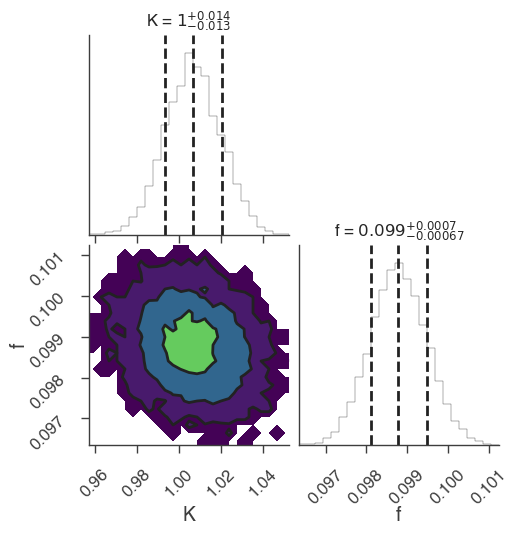

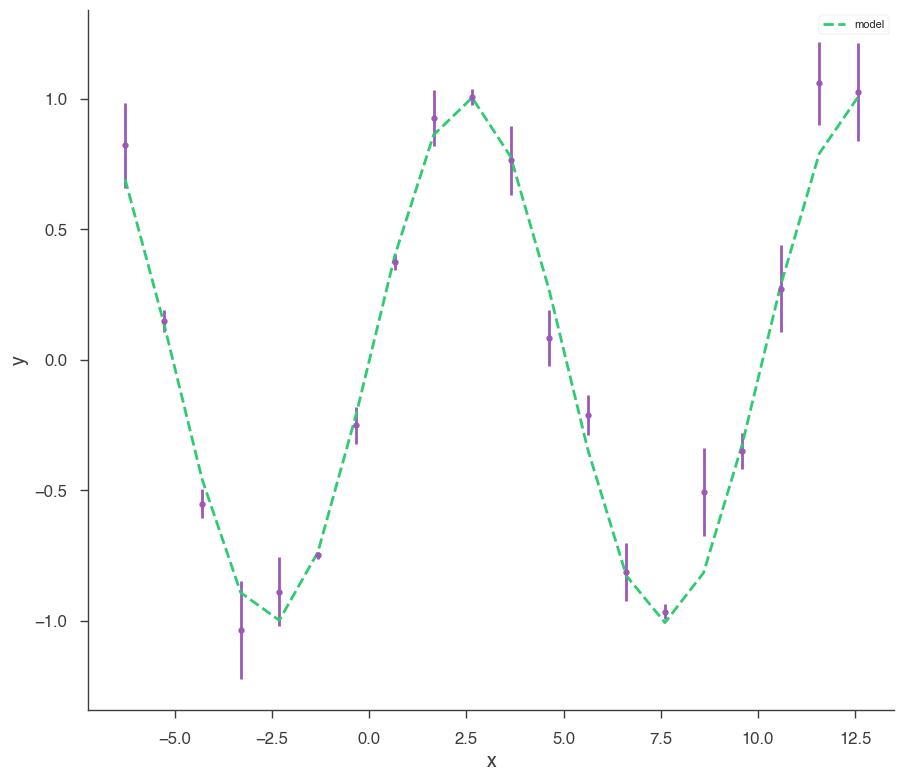

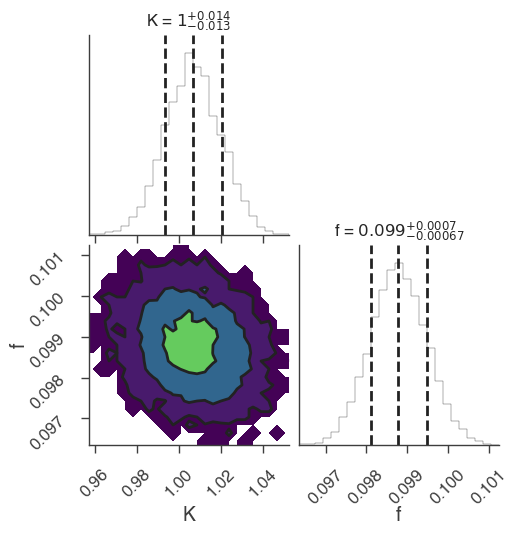

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

22:17:52 INFO      sampler set to ultranest                                                ]8;id=978264;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=48566;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 6121


[ultranest]   logZ = -20.23 +- 0.1392


[ultranest] Effective samples strategy satisfied (ESS = 971.5, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.43, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.14 tail:0.41 total:0.43 required:<0.50


[ultranest] done iterating.


22:17:59 INFO      fit restored to maximum of posterior                                         ]8;id=740829;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=26041;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=176953;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=332217;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.007 -0.014 +0.012,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.88 -0.06 +0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.925473
total,-10.925473


Values of statistical measures:

,statistical measures
AIC,26.556829
BIC,27.842411
DIC,25.916953
PDIC,2.032554
log(Z),-8.790191


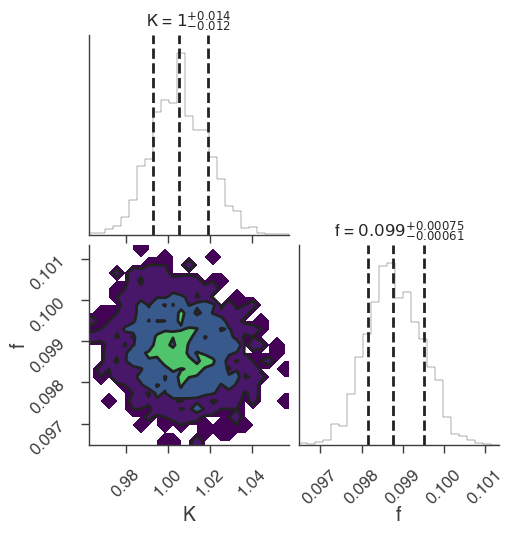

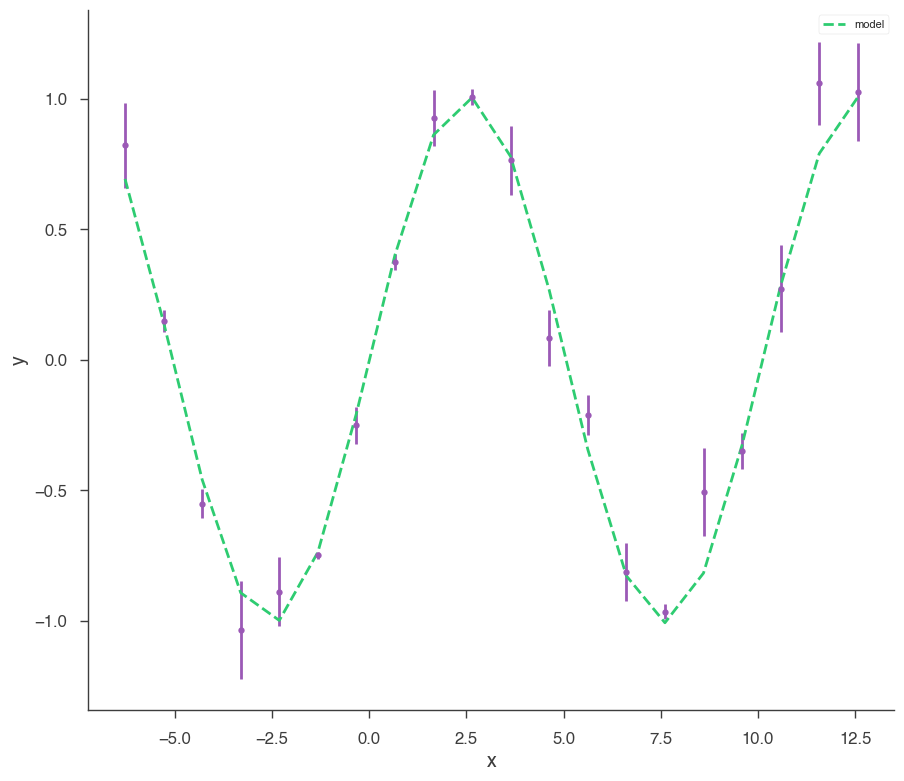

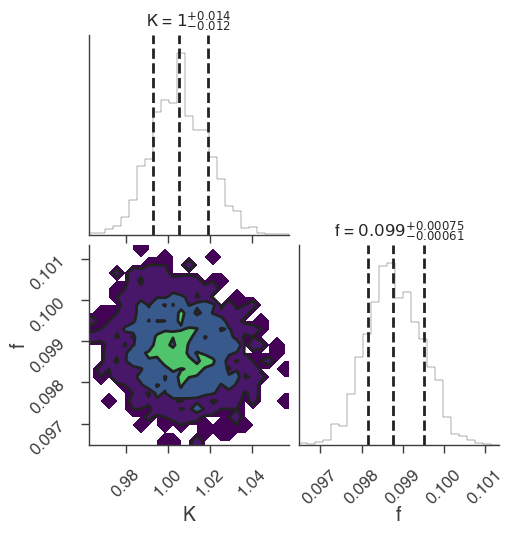

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()